In [103]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt
import os

## Compressing one 8x8 block

In [104]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [105]:
#getting an 8x8 block
init_x=50
init_y=100
block = np.array(im[init_x:init_x+8, init_y:init_y+8], dtype=float)-128

In [106]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [107]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix
    
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    return np.round(block_val/q_mat_val)
    if block_val>0:
        return np.floor((block_val+np.floor(q_mat_val/2))/q_mat_val)
    else:
        return np.floor((block_val-np.floor(q_mat_val/2))/q_mat_val)

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [108]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [109]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [110]:
np.round(np.matrix(dct_matrix())*np.matrix(dct_matrix().transpose()),2)

array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  1.]])

In [111]:
np.matrix(np.round(dct_funct(block), 0))

matrix([[-196., -171.,  138.,   28.,  -37.,   -3.,   54.,  -30.],
        [ 111., -122.,   80.,    6.,   -9.,   35.,   25.,  -17.],
        [  65.,  -21.,  -36.,  108.,  -47.,   12.,   33.,   -8.],
        [ -32.,   61.,  -75.,   40.,    6.,  -48.,   52.,   -1.],
        [ -18.,   15.,   29.,  -70.,   74.,  -23.,   -6.,   23.],
        [  11.,   10.,   19.,   -8.,  -26.,   57.,  -51.,   23.],
        [   0.,    9.,  -28.,   31.,  -28.,   36.,   11.,  -31.],
        [  -8.,   -9.,   22.,  -18.,   11.,  -20.,   17.,  -11.]])

In [112]:
#quantization of block
quant_block = quantization(np.round(dct_funct(block)), quant_mat)


In [113]:
quant_block

array([[-12., -16.,  14.,   2.,  -2.,  -0.,   1.,  -0.],
       [  9., -10.,   6.,   0.,  -0.,   1.,   0.,  -0.],
       [  5.,  -2.,  -2.,   4.,  -1.,   0.,   0.,  -0.],
       [ -2.,   4.,  -3.,   1.,   0.,  -1.,   1.,  -0.],
       [ -1.,   1.,   1.,  -1.,   1.,  -0.,  -0.,   0.],
       [  0.,   0.,   0.,  -0.,  -0.,   1.,  -0.,   0.],
       [  0.,   0.,  -0.,   0.,  -0.,   0.,   0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.]])

In [114]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [115]:
inv_dct = idct_funct(inv_quant_block)

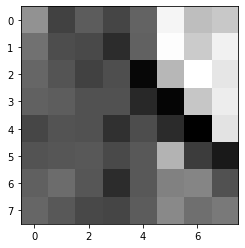

In [116]:
plt.imshow(block,cmap='gray')

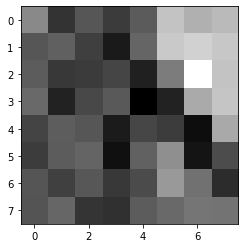

In [117]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [118]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = np.matrix(im[0:224, 0:224], dtype=float)-128

In [119]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

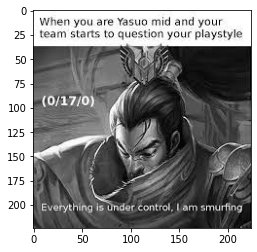

In [120]:
plt.imshow(image_cropped, cmap='gray')

In [121]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = image_cropped[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = np.round(dct_funct(block),0)
        quant = np.round(quantization(dct, quant_mat))
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

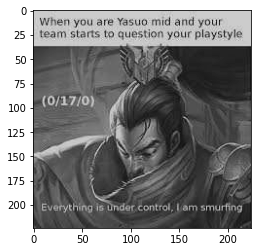

In [122]:
plt.imshow(result, cmap='gray')

## Designing new quantizer

In [123]:
# get image file names
image_file_path = 'data/org/'
files = [f for f in os.listdir(image_file_path)]
files.remove('.DS_Store')
training_set = np.array([])
files = files[:20]

In [124]:
# functions for creating and storing DCT of 8x8 blocks

def import_image(file_path):
    im = cv2.imread(image_file_path + file_path)
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#cuts images into 8x8 blocks and applies dct, returns array of 8x8 matricies
def blockify(image):
    len_rounded = int(image.shape[0]/8)
    width_rounded = int(image.shape[1]/8)
    return_array = np.zeros(shape=(len_rounded*8, width_rounded*8))

    for i in range(len_rounded):
        for j in range(width_rounded):
            image_block = np.array(image[i*8:(i+1)*8, j*8:(j+1)*8], dtype=float) #decide whether to subtract 128
            return_array[i*8:(i+1)*8, j*8:(j+1)*8] = dct_funct(image_block)
    return return_array

def generate_training(dct_block):
    return_arr = []
    len_rounded = int(dct_block.shape[0]/8)
    width_rounded = int(dct_block.shape[1]/8)
    for i in range(len_rounded):
        for j in range(width_rounded):
            return_arr.append(dct_block[i*8:(i+1)*8, j*8:(j+1)*8])
    return return_arr
    
def quantization(dct_block):
    pass

def reconstruct(quantized_block):
    len_rounded = int(quantized_block.shape[0]/8)
    width_rounded = int(quantized_block.shape[1]/8)
    recon_image = np.zeros(shape=(len_rounded*8, width_rounded*8))
    for i in range(len_rounded):
        for j in range(width_rounded):
            recon_image[8*i:8*(i+1), 8*j:8*(j+1)] = idct_funct(quantized_block[8*i:8*(i+1), 8*j:8*(j+1)])
    return recon_image


In [125]:
bit_al_mat = np.matrix([[6,4,3,1,0,0,0,0],
                        [3,2,2,0,0,0,0,0],
                        [1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        ])

## Training quantizer with zero channel error

In [126]:
#for testing, using kmeans clustering algorithm (doesnt account for channel error)
from sklearn.cluster import KMeans
mat_len = bit_al_mat.shape[0]
mat_width = bit_al_mat.shape[1]
quantizer_array = []
for i in range(mat_len):
    for j in range(mat_width):
        if bit_al_mat[i,j]!=0:
            print(bit_al_mat[i,j], 2**bit_al_mat[i,j], (i,j))
            quantizer_array.append([KMeans(n_clusters=2**bit_al_mat[i,j]), (i,j)])

# TODO: create a function that takes in matrix and automatically creates quantizers for each element in matrix

6 64 (0, 0)
4 16 (0, 1)
3 8 (0, 2)
1 2 (0, 3)
3 8 (1, 0)
2 4 (1, 1)
2 4 (1, 2)
1 2 (2, 0)
1 2 (2, 1)
1 2 (2, 2)


In [127]:
training_set = []
count = 0
for image_path in files:
    print(count)
    count =count+1
    blocks = blockify(import_image(image_path))
    training_set = training_set + generate_training(blocks)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [128]:
# training quantizers
count = 0
for element in quantizer_array:
    print(count)
    count =count + 1
    bit_location = element[1]
    element[0].fit(np.array(training_set)[:,bit_location[0],bit_location[1]].reshape(-1,1))

0
1
2
3
4
5
6
7
8
9


## Testing quantizer with zero channel error

In [129]:
image = cv2.imread(image_file_path+ files[4])
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_dct_blocks = blockify(image)

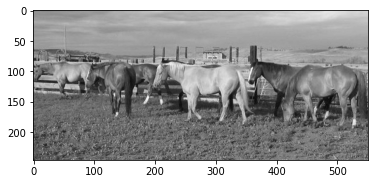

In [130]:
#before compression
plt.imshow(image, cmap='gray')

In [131]:
quantizer_array[0][0].predict([[2]])

array([42], dtype=int32)

In [132]:
return_block_array = []
length = int(image.shape[0]/8)
width = int(image.shape[1]/8)
quantized_output = np.zeros(shape=(length*8, width*8))
for i in range(length):
    for j in range(width):
        block = image_dct_blocks[i*8: (i+1)*8, j*8: (j+1)*8]
        quantized_block = np.zeros(shape=(8,8))
        for element in quantizer_array:
            location = element[1]
            centroid_locations = element[0].cluster_centers_
            pixel_val = block[location]
            centroid_num = element[0].predict([[pixel_val]])[0]
            quantized_block[location] = centroid_locations[centroid_num].copy()
        quantized_output[i*8: (i+1)*8, j*8: (j+1)*8] = quantized_block



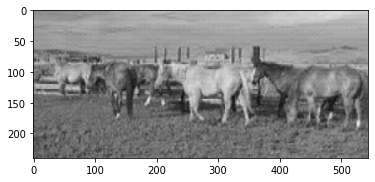

In [133]:
plt.imshow(reconstruct(quantized_output), cmap='gray')

## Channel optimized quantizer

Implementing quantizer that is channel optimized for a memoryless channel

In [134]:
#importing channel optimized channel
cluster = KMeans(2)
cluster.fit(np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1))
cluster.cluster_centers_

array([[3.],
       [8.]])